In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the dataset
df=pd.read_csv('car_evaluation.csv',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.shape

(1728, 7)

In [5]:
df.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object

In [6]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [7]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']   
df.columns=col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,5more,4,big,med,unacc
freq,432,432,432,576,576,576,1210


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
for i in col_names:
    print(i)
    print(df[i].value_counts())

buying
med      432
high     432
low      432
vhigh    432
Name: buying, dtype: int64
maint
med      432
high     432
low      432
vhigh    432
Name: maint, dtype: int64
doors
5more    432
4        432
3        432
2        432
Name: doors, dtype: int64
persons
4       576
more    576
2       576
Name: persons, dtype: int64
lug_boot
big      576
med      576
small    576
Name: lug_boot, dtype: int64
safety
med     576
high    576
low     576
Name: safety, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [11]:
X=df.drop(['class'],axis=1)
Y=df['class']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1382, 6)
(346, 6)
(1382,)
(346,)


In [14]:
# Feature Engineering
# Convert raw data into useful features that help us enderstand oyr model better and increase prediction accuracy

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,vhigh,5more,more,big,high
901,med,vhigh,3,4,small,med
1709,low,low,5more,2,big,high
706,high,med,4,2,med,med
678,high,med,3,2,med,low


In [16]:
# import category encoders

import category_encoders as ce
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [18]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


<AxesSubplot:>

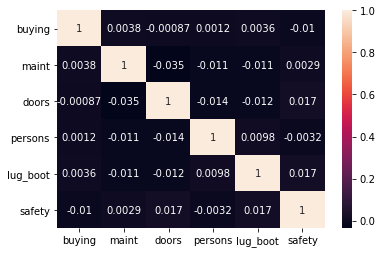

In [26]:
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [19]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
dct_gini=DecisionTreeClassifier(criterion='entropy',random_state=0)

# Fit the model
dct_gini.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
# Prediction test
predict_gini=dct_gini.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
print("Model accuracy is",accuracy_score(Y_test,predict_gini))

Model accuracy is 0.9595375722543352


In [23]:
# Prediction train
predict_gini_train=dct_gini.predict(X_train)

In [24]:
# Training set accuracy and test set accuracy
print("Training set accuracy is",accuracy_score(Y_train,predict_gini_train))

Training set accuracy is 1.0


In [25]:
print("Test set accuracy is",accuracy_score(Y_test,predict_gini))

Test set accuracy is 0.9595375722543352
